**Tomando como base el notebook manifold-learning.ipynb visto en clase de teoría (se incluye 
una copia en este enunciado, puedes cortar y pegar de este notebook lo que necesites), crea un 
notebook llamado comercializadora.ipynb donde se le apliquen al problema de la 
comercializadora los métodos indicados a continuación.**

__1. PCA__

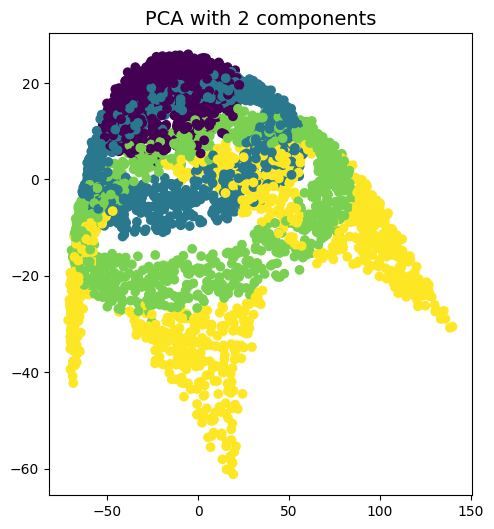

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# * PCA
# Cargar datos
data = pd.read_excel("4000datosSimuladosEnergia.xlsx")

# Seleccionar atributos
X = data.iloc[:, 1:10]
y = data["Perfil de contrato"]


fig = plt.figure(figsize=(12,6))
k = 8

points = X
color = y

pca = PCA(n_components=2)
pca.fit(points)
X_pca = pca.transform(points)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
ax.set_title('PCA with 2 components', size=14)

# Mostrar el plot
plt.show()


__2. LLE LTSA__

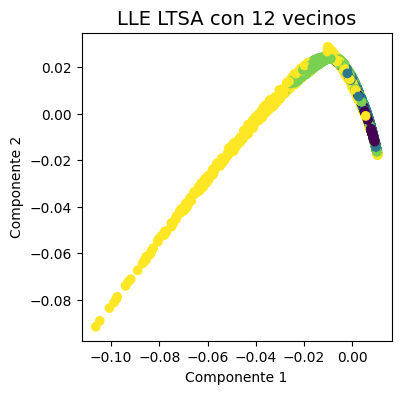

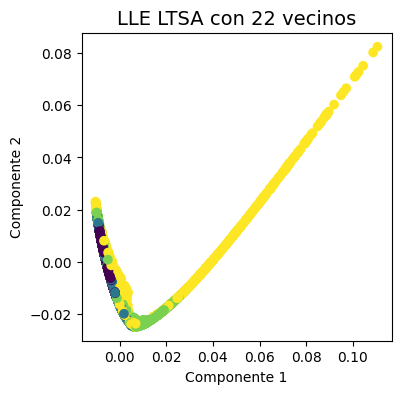

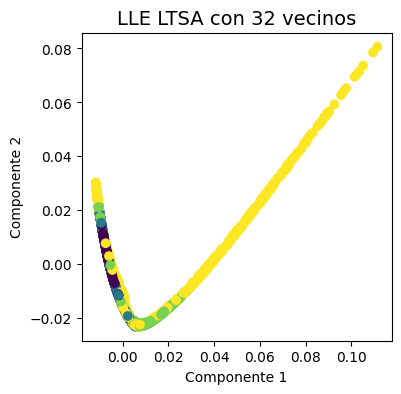

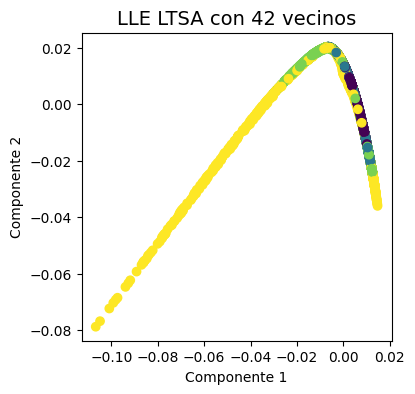

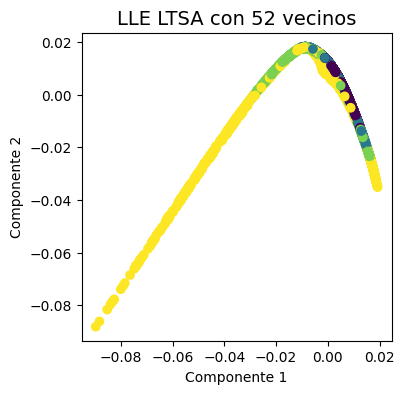

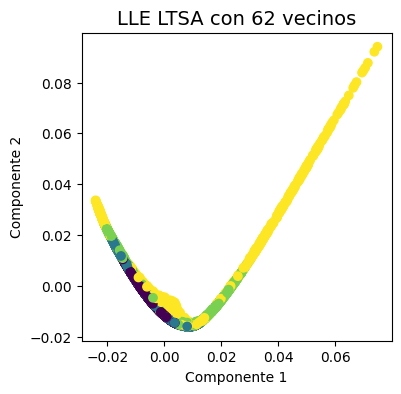

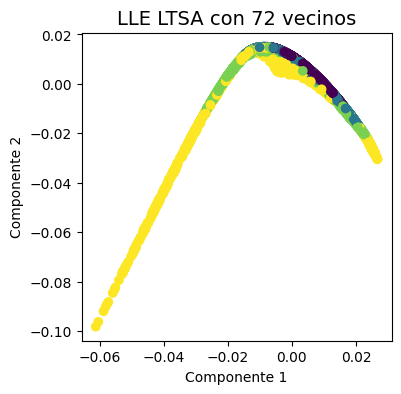

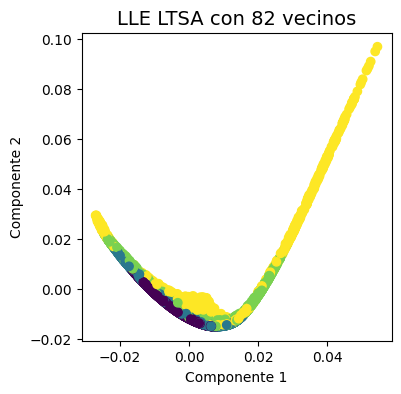

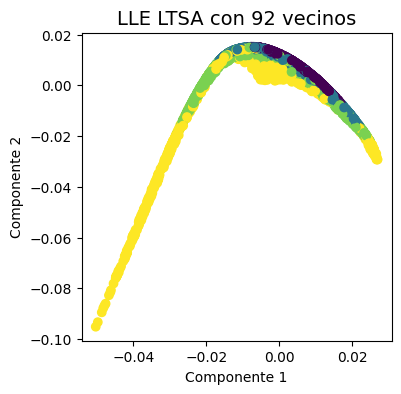

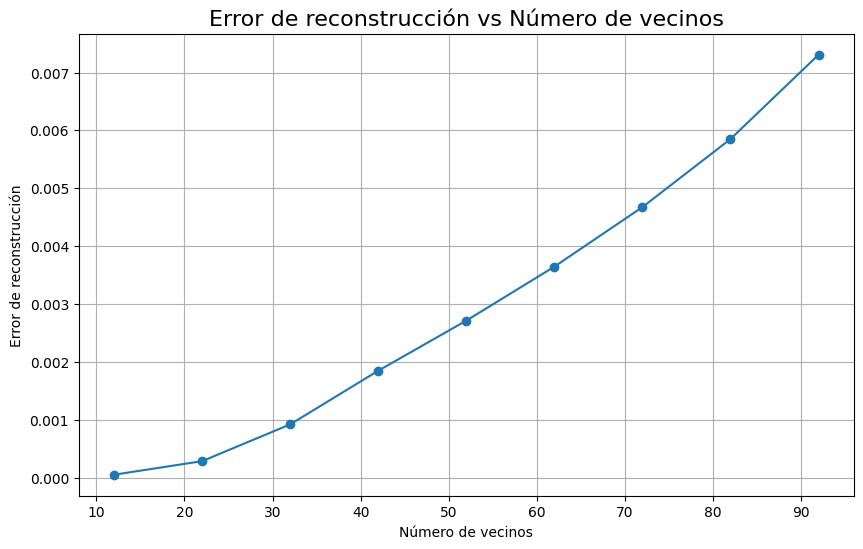

El número óptimo de vecinos es: 12 con un error de reconstrucción de 0.0000


In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import manifold

# Leer el archivo excel
df = pd.read_excel("4000datosSimuladosEnergia.xlsx")

# Extraer los atributos y el perfil de contrato
X = df.iloc[:, 0:10].values
y = df.iloc[:, -1].values

# Definir los parámetros del método LLE LTSA
n_components = 2  # número de coordenadas para el manifold

# Lista para almacenar los errores de reconstrucción
reconstruction_errors = []

# Probar con diferentes números de vecinos
for i in range(12, 100, 10):
    params = {
        "n_neighbors": i,
        "n_components": n_components,
        "eigen_solver": "auto",
        "random_state": 0,
    }

    # Crear y ajustar el modelo LLE LTSA
    model = manifold.LocallyLinearEmbedding(method="ltsa", **params)
    X_lle = model.fit_transform(X)
    
    # Calcular y almacenar el error de reconstrucción
    reconstruction_error = model.reconstruction_error_
    reconstruction_errors.append((i, reconstruction_error))

    # Crear una figura y dibujar el diagrama de dispersión
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
    ax.set_title(f"LLE LTSA con {i} vecinos", size=14)
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    plt.show()

# Extraer los vecinos y sus errores
vecinos, errores = zip(*reconstruction_errors)

# Graficar el error de reconstrucción para cada número de vecinos
plt.figure(figsize=(10, 6))
plt.plot(vecinos, errores, marker='o')
plt.title("Error de reconstrucción vs Número de vecinos", size=16)
plt.xlabel("Número de vecinos")
plt.ylabel("Error de reconstrucción")
plt.grid(True)
plt.show()

# Encontrar el número de vecinos con el menor error de reconstrucción
optimo_vecinos = vecinos[errores.index(min(errores))]
print(f"El número óptimo de vecinos es: {optimo_vecinos} con un error de reconstrucción de {min(errores):.4f}")


__3. MDS__

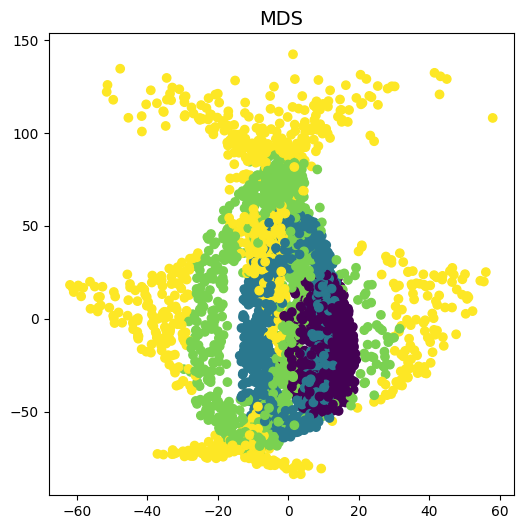

In [3]:
# Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import manifold

# Cargar datos
data = pd.read_excel("4000datosSimuladosEnergia.xlsx")

# Seleccionar atributos
X = data.iloc[:, 1:10]
y = data["Perfil de contrato"]

points = X
color = y

fig = plt.figure(figsize=(6,6))
model = manifold.MDS(
    n_components=2,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False,
)
X = model.fit_transform(points)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.set_title('MDS', size=14)
plt.show()

__4. UMAP__

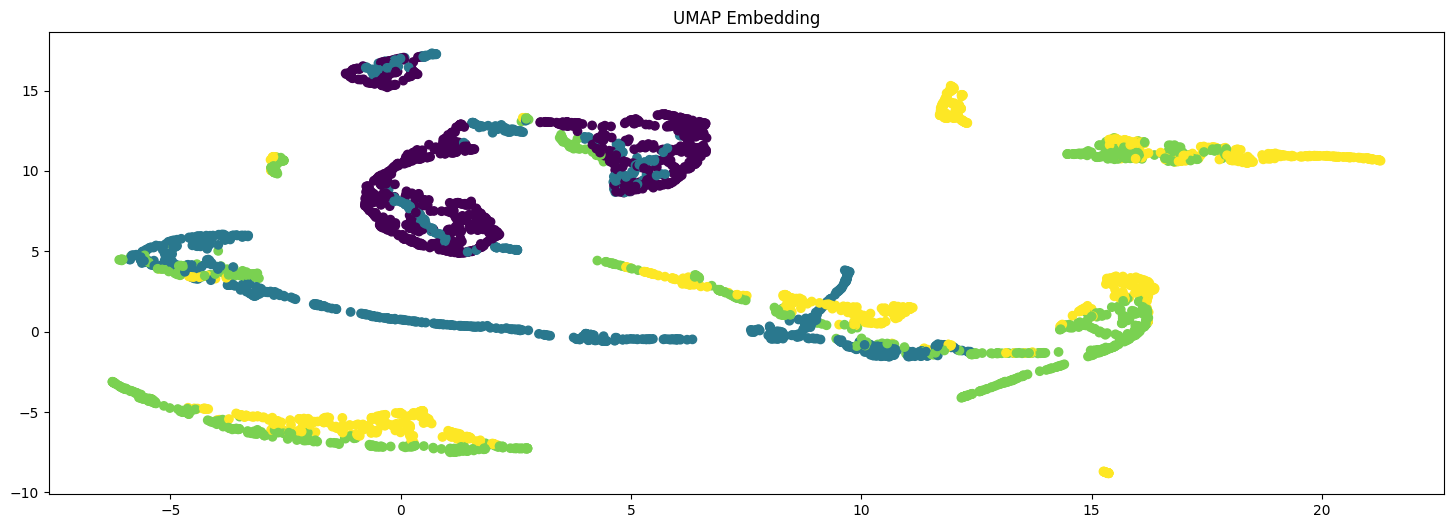

In [8]:
# Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
from umap import UMAP

# Cargar datos
data = pd.read_excel("4000datosSimuladosEnergia.xlsx")

# Seleccionar atributos
X = data.iloc[:, 1:10]
y = data["Perfil de contrato"]

points = X
color = y

# Eliminar random_state para habilitar paralelismo
pumap = UMAP(n_components=2, init="random", n_jobs=-1)  # Usar todos los procesadores disponibles
sr_umap = pumap.fit_transform(points)

fig, axs = plt.subplots(figsize=(18, 6))
axs.scatter(sr_umap[:, 0], sr_umap[:, 1], c=color)
_ = axs.set_title("UMAP Embedding")

__PARTE OPCIONAL 1__

__1. SAMMON__

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
import numpy as np
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn import datasets, manifold
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import KernelPCA
from umap import UMAP

In [10]:
class MDS:

    n_components = 2
    dissimilarity = "euclidean"
    embedding_ = None
    dissimilarity_matrix_ = None

    def __init__(self, n_components:int=2, dissimilarity="euclidean"):

        self.n_components = n_components
        if not dissimilarity in ["euclidean", "cosine", "precomputed"]:
            raise ValueError()
        self.dissimilarity = dissimilarity


    def fit(self, X:np.ndarray):
        
        n = X.shape[0]

        if self.dissimilarity == "euclidean":
            tmp = np.tile(X, (n, 1, 1))
            self.dissimilarity_matrix_ = np.sqrt(np.square(tmp - tmp.transpose((1, 0, 2))).sum(axis=2))
        elif self.dissimilarity == "cosine":
            tmp = np.dot(X, X.T)
            norm = np.sqrt(np.square(X).sum(axis=1))
            self.dissimilarity_matrix_ = 1 - tmp / norm / norm.reshape(-1, 1)
        else:
            self.dissimilarity_matrix_ = X
        
        h = np.eye(n) - np.ones((n, n)) / n
        k = -0.5 * np.dot(np.dot(h, self.dissimilarity_matrix_), h)
        evl, evc = np.linalg.eigh(k)
        evl_asort = evl.argsort()
        eids = evl_asort[::-1][:self.n_components]
        lamb = np.diag(evl[eids])
        v = evc[:, eids]
        self.embedding_ = np.dot(np.sqrt(lamb), v.T).T

    def fit_transform(self, X:np.ndarray):

        self.fit(X)
        return self.embedding_

In [11]:
def sammon(x, n, display = 1, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'default'):



    """Perform Sammon mapping on dataset x

    y = sammon(x) applies the Sammon nonlinear mapping procedure on
    multivariate data x, where each row represents a pattern and each column
    represents a feature.  On completion, y contains the corresponding
    co-ordinates of each point on the map.  By default, a two-dimensional
    map is created.  Note if x contains any duplicated rows, SAMMON will
    fail (ungracefully). 

    [y,E] = sammon(x) also returns the value of the cost function in E (i.e.
    the stress of the mapping).

    An N-dimensional output map is generated by y = sammon(x,n) .

    A set of optimisation options can be specified using optional
    arguments, y = sammon(x,n,[OPTS]):

       maxiter        - maximum number of iterations
       tolfun         - relative tolerance on objective function
       maxhalves      - maximum number of step halvings
       input          - {'raw','distance'} if set to 'distance', X is 
                        interpreted as a matrix of pairwise distances.
       display        - 0 to 2. 0 least verbose, 2 max verbose.
       init           - {'pca', 'cmdscale', random', 'default'}
                        default is 'pca' if input is 'raw', 
                        'msdcale' if input is 'distance'

    The default options are retrieved by calling sammon(x) with no
    parameters.

    File        : sammon.py
    Date        : 18 April 2014
    Authors     : Tom J. Pollard (tom.pollard.11@ucl.ac.uk)
                : Ported from MATLAB implementation by 
                  Gavin C. Cawley and Nicola L. C. Talbot

    Description : Simple python implementation of Sammon's non-linear
                  mapping algorithm [1].

    References  : [1] Sammon, John W. Jr., "A Nonlinear Mapping for Data
                  Structure Analysis", IEEE Transactions on Computers,
                  vol. C-18, no. 5, pp 401-409, May 1969.

    Copyright   : (c) Dr Gavin C. Cawley, November 2007.

    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 2 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program; if not, write to the Free Software
    Foundation, Inc., 59 Temple Place, Suite 330, Boston, MA 02111-1307 USA

    """

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        D = x
        if init == 'default':
            init = 'cmdscale'
    else:
        D = cdist(x, x)
        if init == 'default':
            init = 'pca'

    if inputdist == 'distance' and init == 'pca':
        raise ValueError("Cannot use init == 'pca' when inputdist == 'distance'")

    if np.count_nonzero(np.diagonal(D)) > 0:
        raise ValueError("The diagonal of the dissimilarity matrix must be zero")

    # Remaining initialisation
    N = x.shape[0]
    scale = 0.5 / D.sum()
    D = D + np.eye(N)     

    if np.count_nonzero(D<=0) > 0:
        raise ValueError("Off-diagonal dissimilarities must be strictly positive")   

    Dinv = 1 / D
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n] 
    elif init == 'cmdscale':
        y,e = cmdscale(D)
        y = y[:,:n]
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = cdist(y,y) + np.eye(N)
    dinv = 1. / d
    delta = D-d 
    E = ((delta**2)*Dinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = np.reshape(s, (-1,n),order='F')
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = 0.5*s

        # Bomb out if too many halving steps are required
        if j == maxhalves-1:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = %d : E = %12.10f'% (i+1, E * scale))

    if i == maxiter-1:
        print('Warning: maxiter exceeded. Sammon mapping may not have converged...')

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sammon import sammon 

# Cargar los datos
file_path = '4000datosSimuladosEnergia.xlsx'
data = pd.read_excel(file_path)

# Seleccionar los atributos y la columna de color (Perfil de contrato)
X = data.iloc[:, 0:10].values  # Selección de las primeras 10 columnas de atributos
y = data['Perfil de contrato']  # Selección de la columna "Perfil de contrato" para colorear

# Aplicar Sammon Mapping para reducir los datos a 2 dimensiones
# Si es necesario, modifica los parámetros del método sammon según tus necesidades
n_components = 2
mapped_data, stress = sammon(X, n=n_components)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(18, 6))
scatter = ax.scatter(mapped_data[:, 0], mapped_data[:, 1], c=y, cmap='tab10')
ax.set_title(f"Sammon Mapping (Stress: {stress:.4f})")
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
plt.colorbar(scatter, ax=ax, label='Perfil de contrato')
plt.show()



__2. ISOMAP__

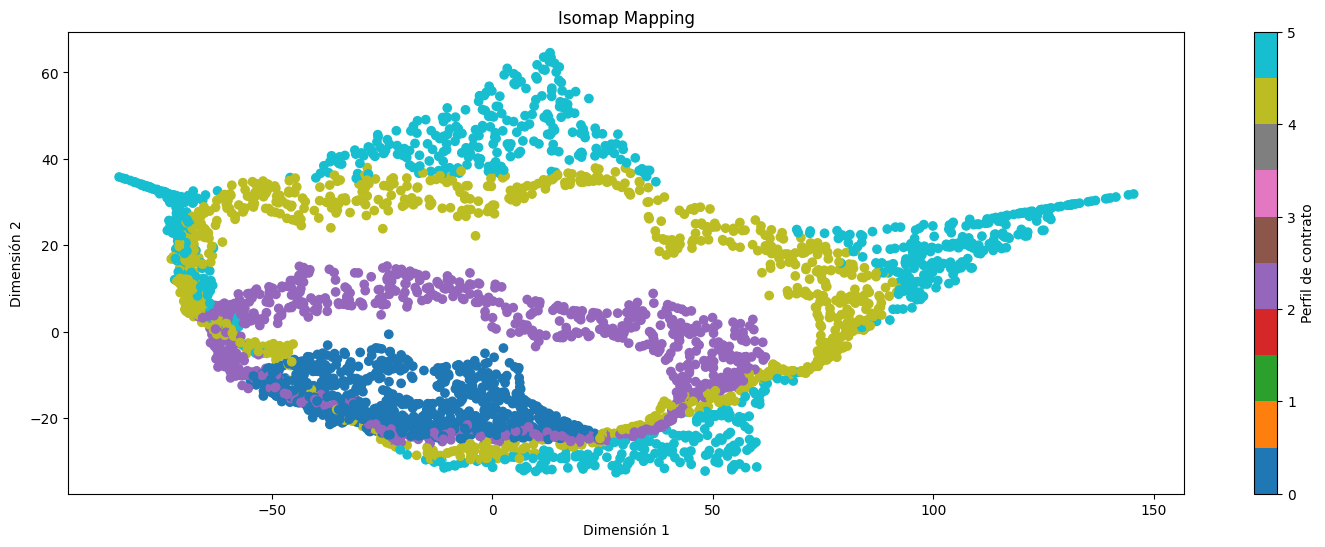

In [6]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Cargar los datos
file_path = '4000datosSimuladosEnergia.xlsx'
data = pd.read_excel(file_path)

# Seleccionar los atributos y la columna de color (Perfil de contrato)
X = data.iloc[:, 0:10].values  # Selección de las primeras 10 columnas de atributos
y = data['Perfil de contrato']  # Selección de la columna "Perfil de contrato" para colorear

# Aplicar Isomap para reducir los datos a 2 dimensiones
n_components = 2
isomap = Isomap(n_components=n_components, n_neighbors=10)  # Ajusta el número de vecinos si es necesario
mapped_data = isomap.fit_transform(X)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(18, 6))
scatter = ax.scatter(mapped_data[:, 0], mapped_data[:, 1], c=y, cmap='tab10')
ax.set_title("Isomap Mapping")
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
plt.colorbar(scatter, ax=ax, label='Perfil de contrato')
plt.show()

__3. T_SNE__

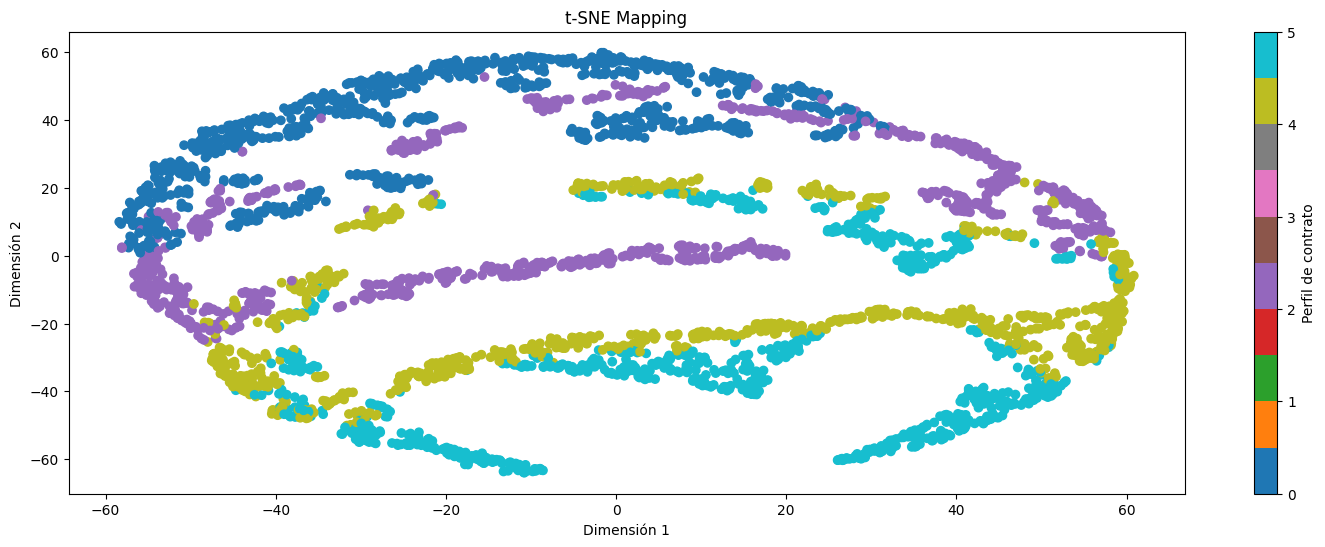

In [14]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Cargar los datos
file_path = '4000datosSimuladosEnergia.xlsx'
data = pd.read_excel(file_path)

# Seleccionar los atributos y la columna de color (Perfil de contrato)
X = data.iloc[:, 0:10].values  # Selección de las primeras 10 columnas de atributos
y = data['Perfil de contrato']  # Selección de la columna "Perfil de contrato" para colorear

# Aplicar t-SNE para reducir los datos a 2 dimensiones
n_components = 2
tsne = TSNE(n_components=n_components, random_state=42)  # Puedes ajustar el random_state para reproducibilidad
mapped_data = tsne.fit_transform(X)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(18, 6))
scatter = ax.scatter(mapped_data[:, 0], mapped_data[:, 1], c=y, cmap='tab10')
ax.set_title("t-SNE Mapping")
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
plt.colorbar(scatter, ax=ax, label='Perfil de contrato')
plt.show()


__PARTE OPCIONAL 2__

__Kernel PCA utilizando los kernels Sigmoide y RBF__

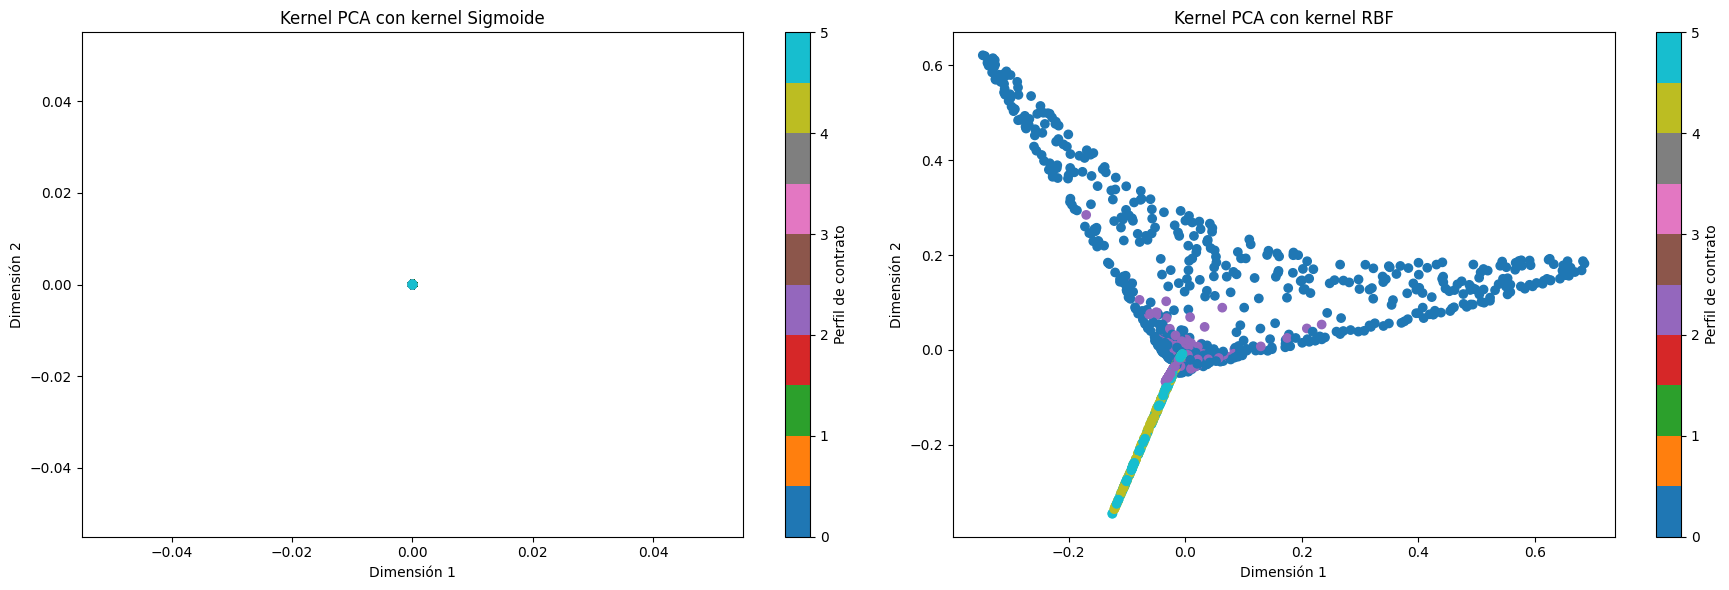

In [17]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Cargar los datos
file_path = '4000datosSimuladosEnergia.xlsx'
data = pd.read_excel(file_path)

# Seleccionar los atributos y la columna de color (Perfil de contrato)
X = data.iloc[:, 0:10].values  # Selección de las primeras 10 columnas de atributos
y = data['Perfil de contrato']  # Selección de la columna "Perfil de contrato" para colorear

# Kernel PCA con kernel Sigmoide
kpca_sigmoid = KernelPCA(kernel='sigmoid', gamma=0.01, coef0=1, n_components=2)  # Ajusta gamma y coef0 según sea necesario
X_sigmoid = kpca_sigmoid.fit_transform(X)

# Kernel PCA con kernel RBF
kpca_rbf = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)  # Ajusta gamma para el kernel RBF
X_rbf = kpca_rbf.fit_transform(X)

# Graficar los resultados de Kernel PCA con kernel Sigmoide
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Graficar con kernel Sigmoide
ax[0].scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c=y, cmap='tab10')
ax[0].set_title("Kernel PCA con kernel Sigmoide")
ax[0].set_xlabel('Dimensión 1')
ax[0].set_ylabel('Dimensión 2')
plt.colorbar(ax[0].collections[0], ax=ax[0], label='Perfil de contrato')

# Graficar con kernel RBF
ax[1].scatter(X_rbf[:, 0], X_rbf[:, 1], c=y, cmap='tab10')
ax[1].set_title("Kernel PCA con kernel RBF")
ax[1].set_xlabel('Dimensión 1')
ax[1].set_ylabel('Dimensión 2')
plt.colorbar(ax[1].collections[0], ax=ax[1], label='Perfil de contrato')

plt.tight_layout()
plt.show()